### Instruction

Dataset
In this homework, we will use the Laptops price dataset from Kaggle.

Here's a wget-able link:
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv

The goal of this homework is to create a regression model for predicting the prices (column 'Final Price').

Preparing the dataset
First, we'll normalize the names of the columns:

df.columns = df.columns.str.lower().str.replace(' ', '_')
Now, instead of 'Final Price', we have 'final_price'.

Next, use only the following columns:

'ram',
'storage',
'screen',
'final_price'

In [146]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle

In [147]:
df = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv")


In [148]:
df.head(5)

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [149]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [120]:
df.head(5)

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


<Axes: xlabel='ram', ylabel='Count'>

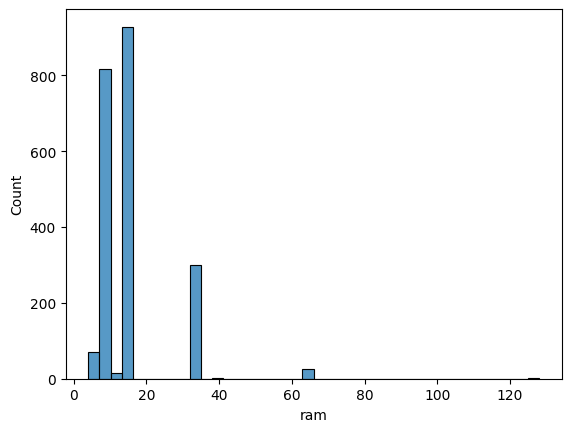

In [121]:
sns.histplot(df['ram'], bins=40)

<Axes: xlabel='storage', ylabel='Count'>

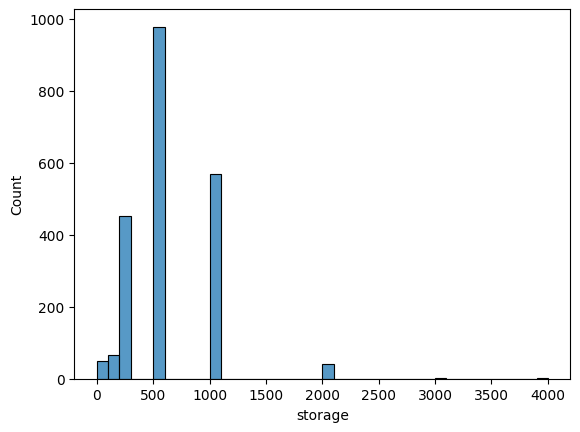

In [122]:
sns.histplot(df['storage'], bins=40)

<Axes: xlabel='screen', ylabel='Count'>

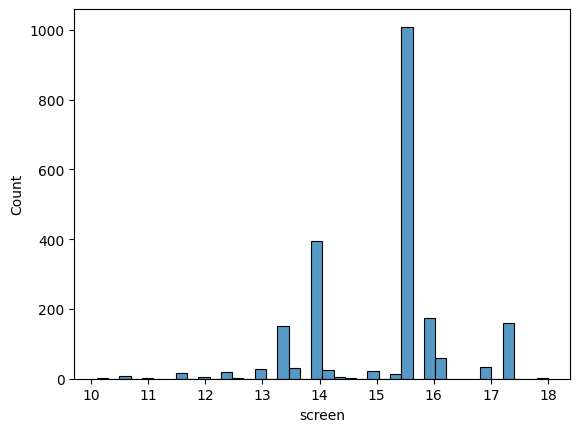

In [123]:
sns.histplot(df['screen'], bins=40)


<Axes: xlabel='final_price', ylabel='Count'>

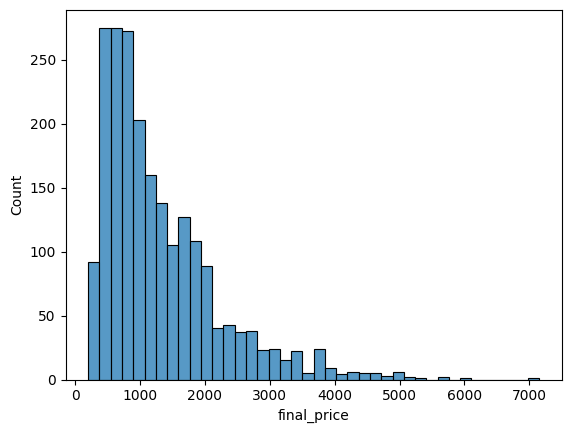

In [150]:
sns.histplot(df['final_price'], bins=40)

Yes, the final_price has a long tail.

# Question 1
There's one column with missing values. What is it?

In [125]:
df.isna().sum()

laptop             0
status             0
brand              0
model              0
cpu                0
ram                0
storage            0
storage_type      42
gpu             1371
screen             4
touch              0
final_price        0
dtype: int64

Answer is Screen

# Question 2
Prepare and split the dataset

Shuffle the dataset (the filtered one you created above), use seed 42.
Split your data in train/val/test sets, with 60%/20%/20% distribution.

In [126]:
df['ram'].median()

np.float64(16.0)

50th percentile of ram is 16

### Prepare and split the datasetD

In [127]:
#Shuffle the dataset (the filtered one you created above), use seed 42
df.dtypes

laptop           object
status           object
brand            object
model            object
cpu              object
ram               int64
storage           int64
storage_type     object
gpu              object
screen          float64
touch            object
final_price     float64
dtype: object

In [151]:
df_subset = df[['ram', 'storage', 'screen', 'final_price']]

In [152]:
df_subset

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
...,...,...,...,...
2155,16,1000,17.3,2699.99
2156,16,1000,17.3,2899.99
2157,32,1000,17.3,3399.99
2158,16,1000,13.4,1899.99


In [153]:
df_subset.isna().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

### Split your data in train/val/test sets, with 60%/20%/20% distribution

In [154]:
n = len(df_subset)
n_test =int (n * 0.2)
n_val = int(n * 0.2)
n_train = n - (n_test + n_val)

In [155]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)


In [156]:
df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()


In [157]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [158]:
y_train = df_train.final_price.values
y_val = df_val.final_price.values
y_test = df_test.final_price.values

del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

# Question 3
We need to deal with missing values for the column from Q1.
We have two options: fill it with 0 or with the mean of this variable.
Try both options. For each, train a linear regression model without regularization using the code from the lessons.
For computing the mean, use the training only!
Use the validation dataset to evaluate the models and compare the RMSE of each option.
Round the RMSE scores to 2 decimal digits using round(score, 2)
Which option gives better RMSE?

### Train Linear Regression

In [159]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    
    XTX =X.T.dot(X)
    XTX_inv =np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

### Root Mean Square Error (RMSE)

In [160]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [161]:
def prepare_X(df, fillna_value):
    df = df.fillna(fillna_value)
    X = df.values
    return X

### Handling Missing Values(Fill with 0)

In [ ]:
X_train = prepare_X(df_train, fillna_value=0)
w_0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val, fillna_value=0)
y_pred = w_0 + X_val.dot(w)

rmse(y_val, y_pred)

In [ ]:
print(f"RMSE with missing values filled by zero: {round(rmse_zero, 2)}")

### Handling Missing Values(Fill with mean)

In [259]:
mean_value = df_train.mean()

In [260]:
df_train = df_train.fillna(mean_value)
df_val= df_val.fillna(mean_value)
df_test= df_test.fillna(mean_value)

In [261]:
y_train = np.log1p(df_train.final_price.values)
y_val = np.log1p(df_val.final_price.values)
y_test = np.log1p(df_test.final_price.values)

In [262]:
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [263]:
len(y_train)

1296

In [78]:
X_train = df_train.values

In [79]:
w0, w = train_linear_regression(X_train, y_train)

In [80]:
# Validate
def prepare_X (df_train):
    df_num = df_train
    X = df_num.values
    return X

In [81]:
X_train = prepare_X(df_train)

In [82]:
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)


rmse_mean = rmse(y_val, y_pred)

In [83]:

print(f"RMSE with missing values filled by mean: {round(rmse_mean, 2)}")

RMSE with missing values filled by mean: 0.43


##### Both rmse are good because there is no difference.

# Question 4
Now let's train a regularized linear regression.
For this question, fill the NAs with 0.
Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
Use RMSE to evaluate the model on the validation dataset.
Round the RMSE scores to 2 decimal digits.
Which r gives the best RMSE?

### Regularized model

In [110]:
 def train_linear_regression_reg(X,y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    
    XTX = X.T.dot(X)
    XTX = XTX + 0.01 * np.eye(XTX.shape[0])
    
    XTX_inv =np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [111]:
# Validate
def prepare_X (df_train):
    df_num = df_train
    X = df_num.values
    return X

In [112]:
df_train = df_train.fillna(0)
df_val= df_val.fillna(0)
df_test= df_test.fillna(0)

In [113]:
y_train = np.log1p(df_train.final_price.values)
y_val = np.log1p(df_val.final_price.values)
y_test = np.log1p(df_test.final_price.values)

In [114]:
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [115]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)


    score = rmse(y_val, y_pred)
    
    print(f"The value of r is {r} and rmse score is {round(score,2)}")

The value of r is 0 and rmse score is 0.43
The value of r is 0.01 and rmse score is 0.43
The value of r is 0.1 and rmse score is 0.43
The value of r is 1 and rmse score is 0.43
The value of r is 5 and rmse score is 0.43
The value of r is 10 and rmse score is 0.43
The value of r is 100 and rmse score is 0.43


#### The value of r that gives the best rmse is 0

# Question 5

We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
For each seed, do the train/validation/test split with 60%/20%/20% distribution.
Fill the missing values with 0 and train a model without regularization.
For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
Round the result to 3 decimal digits (round(std, 3))

In [408]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [409]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    
    XTX =X.T.dot(X)
    XTX_inv =np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [410]:
np.random.seed(2)
n = len(df_subset)
n_test =int (n * 0.2)
n_val = int(n * 0.2)
n_train = n - (n_test + n_val)


In [411]:
n, n_test, n_val, n_train


(2160, 432, 432, 1296)

In [412]:
df_train = df_subset.iloc[:n_train]
df_val = df_subset.iloc[n_train:n_train + n_val]
df_test = df_subset.iloc[n_train+n_val:]

In [413]:
# Placeholder for RMSE scores
rmse_scores = []

In [414]:
# Seeds to test
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for seed in seeds:
    idx = np.arange(n)
    np.random.seed
    np.random.shuffle(idx)

In [415]:
df_train =df_subset.iloc[idx[:n_train]]
df_val = df_subset.iloc[idx[n_train:n_train + n_val]]
df_test = df_subset.iloc[idx[n_train+n_val:]]

In [416]:
len(df_train), len(df_val), len(df_test)

(1296, 432, 432)

In [417]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [418]:
df_train = df_train.fillna(0)
df_val= df_val.fillna(0)
df_test= df_test.fillna(0)

In [419]:
y_train = np.log1p(df_train.final_price.values)
y_val = np.log1p(df_val.final_price.values)
y_test = np.log1p(df_test.final_price.values)

In [420]:
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [421]:
X_train = df_train.values


w0, w = train_linear_regression(X_train, y_train)

In [422]:
# Validate
def prepare_X (df_train):
    df_num = df_train
    X = df_num.values
    return X

In [423]:
X_train = prepare_X(df_train)

In [424]:
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)


In [427]:
score = rmse(y_val, y_pred)
rmse_scores.append(score)

In [428]:
std_rmse = np.std(rmse_scores)

In [429]:
print(f"Standard deviation of RMSE scores: {round(std_rmse, 3)}")

Standard deviation of RMSE scores: 0.0


In [13]:

# Define RMSE function
def rmse(y, y_pred):
    se = (y - y_pred) ** 2  # Squared error
    mse = np.mean(se)        # Mean squared error
    return np.sqrt(mse)      # Root mean squared error



In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [16]:
# Placeholder for RMSE scores
rmse_scores = []

# Seeds to test
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Iterate over different seed values
for seed in seeds:
    # Split the data into 60% train, 20% validation, 20% test using the seed
    df_train_full, df_test = train_test_split(df_subset, test_size=0.2, random_state=seed)
    df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=seed)  # 0.25 of 80% is 20%

    

In [18]:
# Separate the target variable (assuming it's called 'target_column')
y_train = df_train['final_price']
y_val = df_val['final_price']
y_test = df_test['final_price']

X_train = df_train.drop(columns=['final_price'])
X_val = df_val.drop(columns=['final_price'])
X_test = df_test.drop(columns=['final_price'])

    

In [19]:
# Fill missing values with 0
X_train = X_train.fillna(0)
X_val = X_val.fillna(0)
X_test = X_test.fillna(0)

   

In [21]:
 # Train the linear regression model without regularization
model = LinearRegression()
model.fit(X_train, y_train)

    # Predict on the validation set
y_pred_val = model.predict(X_val)

    

In [22]:
# Compute RMSE and store the result
score = rmse(y_val, y_pred_val)
rmse_scores.append(score)



Standard deviation of RMSE scores: 0.0


In [23]:
# Print RMSE scores for each seed
for i, score in enumerate(rmse_scores):
    print(f"Seed {seeds[i]}: RMSE = {score}")

# Compute standard deviation
std_rmse = np.std(rmse_scores)
print(f"Standard deviation of RMSE scores: {round(std_rmse, 3)}")


Seed 0: RMSE = 617.0012851255333
Standard deviation of RMSE scores: 0.0


In [24]:
# Compute standard deviation of the RMSE scores
std_rmse = np.std(rmse_scores)

# Output the standard deviation rounded to 3 decimal places
print(f"Standard deviation of RMSE scores: {round(std_rmse, 3)}")


Standard deviation of RMSE scores: 0.0
